## Pandas
https://www.geeksforgeeks.org/pandas/pandas-tutorial/
https://www.w3schools.com/python/pandas/default.asp

Pandas is a Python library used for working with data sets.

It has functions for analyzing, cleaning, exploring, and manipulating data.

Se necesita un DataFrame: *DataFrames: It is a two-dimensional data structure constructed with rows and columns, which is more similar to Excel spreadsheet.*

### Series

In [1]:
import pandas as pd

serie = [1, 7, 2]
## adding label (index) to serie
serie_labeled = pd.Series(serie, index = ["x", "y", "z"])
print(serie_labeled)
## Access by label
print(serie_labeled.x)



# Key / value (python dictionary) as series --> Keys of dictionary become labels
calories = {"day1": 420, "day2": 380, "day3": 390}
calories_serie = pd.Series(calories)
print(calories_serie)



x    1
y    7
z    2
dtype: int64
1
day1    420
day2    380
day3    390
dtype: int64


### Data Frames

In [2]:
cars_dataset = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}

cars_dataframe = pd.DataFrame(cars_dataset)

print(cars_dataframe)


calories_dataset = {
  "day": ["Mon", "Tue", "Wed"],
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
calories_dataframe = pd.DataFrame(calories_dataset)

print(calories_dataframe)

##Access to row
print(f"DataFrame row 1")
print(f"{calories_dataframe.loc[1]}")

##Access to range of rows
print(f"DataFrame row 0 to 1")
print(f"{calories_dataframe.loc[0:1]}")

## Add index to dataframe
calories_dataframe = pd.DataFrame(calories_dataset, index = ["day1", "day2", "day3"])
print(f"{calories_dataframe}")

#refer to the named index:
print(calories_dataframe.loc["day2"])


    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2
   day  calories  duration
0  Mon       420        50
1  Tue       380        40
2  Wed       390        45
DataFrame row 1
day         Tue
calories    380
duration     40
Name: 1, dtype: object
DataFrame row 0 to 1
   day  calories  duration
0  Mon       420        50
1  Tue       380        40
      day  calories  duration
day1  Mon       420        50
day2  Tue       380        40
day3  Wed       390        45
day         Tue
calories    380
duration     40
Name: day2, dtype: object


#### CSV To Pandas

In [3]:
la_liga_dataframe = pd.read_csv('la_liga_standings.csv')
print(la_liga_dataframe.to_string())

# TOP 5
print(la_liga_dataframe.head())

# TOP 2
print(la_liga_dataframe.head(2))

# Last 3
print(la_liga_dataframe.tail(3))

# info
print(la_liga_dataframe.info()) 

    Pos           Equipo  Pts   W   D   L  GF  GA  GD
0     1      Real Madrid   95  29   8   1  87  26  61
1     2        Barcelona   85  26   7   5  79  44  35
2     3           Girona   81  25   6   7  85  46  39
3     4  Atlético Madrid   76  24   4  10  70  43  27
4     5  Athletic Bilbao   68  19  11   8  61  37  24
5     6    Real Sociedad   60  16  12  10  51  39  12
6     7       Real Betis   57  14  15   9  48  45   3
7     8       Villarreal   53  14  11  13  65  65   0
8     9         Valencia   49  13  10  15  40  45  -5
9    10           Alavés   46  12  10  16  36  46 -10
10   11          Osasuna   45  12   9  17  45  56 -11
11   12           Getafe   43  10  13  15  42  52 -10
12   13       Celta Vigo   41  10  11  17  46  57 -11
13   14          Sevilla   41  10  11  17  48  54  -6
14   15         Mallorca   40   8  16  14  33  44 -11
15   16       Las Palmas   40  10  10  18  33  47 -14
16   17   Rayo Vallecano   38   8  14  16  29  48 -19
17   18            Cádiz   3

#### JSON To DataFrame

In [4]:
la_liga_dataframe = pd.read_json('la_liga_2324.json')
print(la_liga_dataframe.to_string())

    Pos           Equipo  Pts   P   W   D   L  GF  GA  GD
0     1      Real Madrid   95  38  29   8   1  87  26  61
1     2        Barcelona   85  38  26   7   5  79  44  35
2     3           Girona   81  38  25   6   7  85  46  39
3     4  Atlético Madrid   76  38  24   4  10  70  43  27
4     5  Athletic Bilbao   68  38  19  11   8  61  37  24
5     6    Real Sociedad   60  38  16  12  10  51  39  12
6     7       Real Betis   57  38  14  15   9  48  45   3
7     8       Villarreal   53  38  14  11  13  65  65   0
8     9         Valencia   49  38  13  10  15  40  45  -5
9    10           Alavés   46  38  12  10  16  36  46 -10
10   11          Osasuna   45  38  12   9  17  45  56 -11


### Data processing with Data Frames

In [22]:
from numpy import fix
from pandas import DataFrame


calories_dataframe_original = pd.read_csv('calories_dataset.csv')
print(calories_dataframe_original.info())
# print(calories_dataframe.to_string())
# print(f"has duplicate {calories_dataframe_original.duplicated()}")

##Delete duplicates
calories_dataframe = calories_dataframe_original.drop_duplicates()
# print(calories_dataframe.to_string())
## Delete NA
# calories_dataframe = calories_dataframe.dropna()
## Replaces NA by a value --> Not usefull in our case
# calories_dataframe = calories_dataframe.fillna(0)
## Replaces NA by a value --> only for a column or a set of columns
calories_dataframe = calories_dataframe.fillna({"Calories": 0})
# Drop de rest of NA rows
calories_dataframe = calories_dataframe.dropna()

def print_dataframe_stats(dataframe, field):
    print("*************Stats*************")
    print(f"Stats for {field}")
    stats = {
        "mean": dataframe[field].mean(),
        "median": dataframe[field].median(),
        "max": dataframe[field].max(),
        "min": dataframe[field].min(),
        "mode": dataframe[field].mode()
    }
    stats_dataframe = pd.DataFrame(stats)
    print(stats_dataframe)
    print("*************END: Stats*************")


print_dataframe_stats(calories_dataframe, "Calories")
print_dataframe_stats(calories_dataframe, "Pulse")
print_dataframe_stats(calories_dataframe, "Maxpulse")


# print(calories_dataframe_original.loc[10:14])
# print(calories_dataframe.loc[10:14])


# fix wrong column formats
calories_dataframe.Date = pd.to_datetime(calories_dataframe['Date'], format='mixed')
# print(calories_dataframe.to_string())

#Considering Row 7 / Duration is too high, we assume data is wrong. 
# One way to fix it is by replicing the value
# Another way is to removing the value
## Direct replacement if we now which is the wrong row
# calories_dataframe.loc[7, 'Duration'] = 45

# calories_dataframe.index contains the index of the row, so it is a numeric value
# Iterate over rows to fix by replacement the ones which are wrong
for row_index in calories_dataframe.index:
    value: int = calories_dataframe.loc[row_index, "Duration"]
    if  value > 300:
        ##Value to high --> setting the limit to 300 minutes
        calories_dataframe.loc[row_index, "Duration"] = 300
    if  value < 0:
        ##This value is negative and it is for Duration --> remove it. No workouts of 0 minutes or less
        calories_dataframe.drop(index=row_index, inplace=True)

print(calories_dataframe.to_string())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  33 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     33 non-null     int64  
 3   Maxpulse  33 non-null     int64  
 4   Calories  31 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB
None
*************Stats*************
Stats for Calories
         mean  median    max  min   mode
0  285.506452   282.4  479.0  0.0  243.0
1  285.506452   282.4  479.0  0.0  300.0
*************END: Stats*************
*************Stats*************
Stats for Pulse
         mean  median  max  min  mode
0  103.354839   103.0  130   90   100
1  103.354839   103.0  130   90   103
*************END: Stats*************
*************Stats*************
Stats for Maxpulse
         mean  median  max  min  mode
0  128.645161   128.0  175  101   120
1  128.645161   128.0

### Correlation
Calcula las relaciones entre las columnas del data set --> busca relaciones es inteligente

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

**Valores positivos** *--> si se incrementa una de las columnas, la otra incrementara tambien*
**Valores Negativos** *--> si se incrementa una de las columnas, la otra DECREMENTARÁ*
**Se considera buena correlacion 0.6 o -0.6**



In [ ]:



from pprint import pprint


def obtain_highest_correlancy(dataframe, limit:float):
    correlation_df = dataframe.corr()
    high_correlancy = {}
    for index in correlation_df.index:
        row = correlation_df.loc[index]
        for row_index in row.index:
            val = float(row[row_index])
            if val == 1.0:
                x=1
            else:
                if val > limit:
                    high_correlancy.setdefault(index, {'column': index, 'row': row_index, 'corr': val})
                if val < -limit:
                    high_correlancy.setdefault(index, {'column': index, 'row': row_index, 'corr': val})
    return high_correlancy

original_large_calories_dataframe = pd.read_csv('calories_large_dataset.csv')

working_large_calories_dataframe = original_large_calories_dataframe.drop_duplicates()
working_large_calories_dataframe.fillna({"Calories": 0})

print_dataframe_stats(calories_dataframe, "Calories")
print_dataframe_stats(calories_dataframe, "Pulse")
print_dataframe_stats(calories_dataframe, "Maxpulse")
print_dataframe_stats(calories_dataframe, "Duration")

# Data is clean, it doesn't contain any deviated value --> Calculate correlation bigger than 0.7
print("Correlation")
pprint(obtain_highest_correlancy(dataframe=working_large_calories_dataframe, limit=0.7))


*************Stats*************
Stats for Calories
         mean  median    max  min   mode
0  286.923333   291.2  479.0  0.0  300.0
*************END: Stats*************
*************Stats*************
Stats for Pulse
         mean  median  max  min  mode
0  103.733333   103.0  130   90   100
1  103.733333   103.0  130   90   103
*************END: Stats*************
*************Stats*************
Stats for Maxpulse
    mean  median  max  min  mode
0  129.1   128.5  175  101   120
1  129.1   128.5  175  101   132
*************END: Stats*************
*************Stats*************
Stats for Duration
   mean  median  max  min  mode
0  64.5    60.0  300   30    60
*************END: Stats*************
Correlation
{'Calories': {'column': 'Calories',
              'corr': 0.9230527948612056,
              'row': 'Duration'},
 'Duration': {'column': 'Duration',
              'corr': 0.9230527948612056,
              'row': 'Calories'},
 'Maxpulse': {'column': 'Maxpulse', 'corr': 0.7870351322

## Pandas PLOT

Para printar graficos

import pandas as pd
import matplotlib.pyplot as plt

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

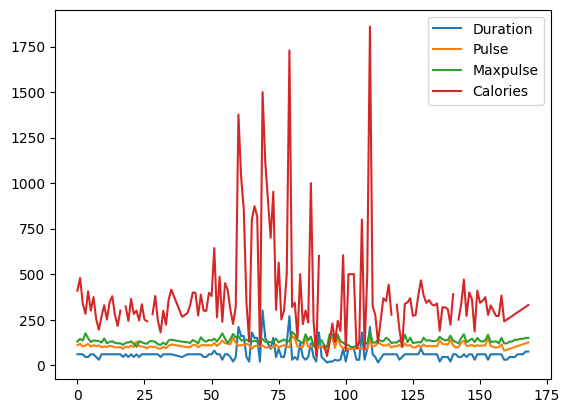

In [35]:

## por defecto
working_large_calories_dataframe.plot()
plt.show()

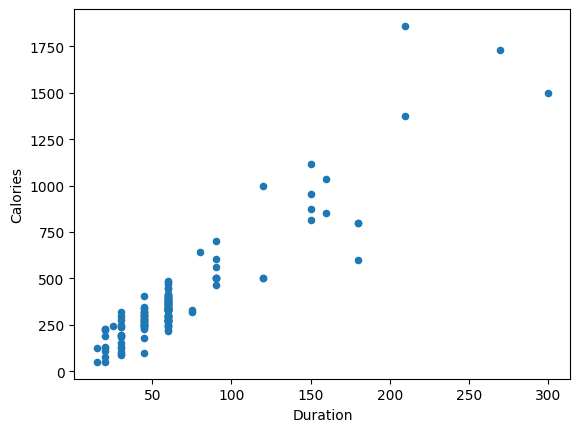

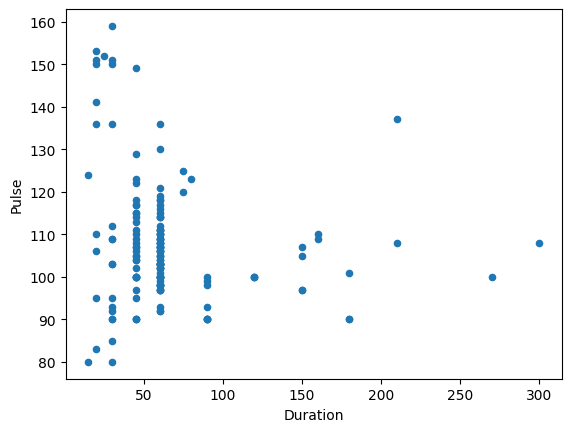

In [ ]:
kind="scatter"
# (function) kind: Literal['line', 'bar', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter', 'hexbin']


working_large_calories_dataframe.plot(kind=kind, x='Duration', y ='Calories')
## Correlation es alta entre Duration y Calories, a mas duracion, mas calorias gastas
print("More Duration of workout, more calories burned. High correlation")
plt.show()

working_large_calories_dataframe.plot(kind=kind, x='Duration', y ='Pulse')
print("Bad correlation. Both columns aren't related.")
print("Observations: The longest activity 300 minutes was light cardio: 110ppm")
print("Observations: Most of the workouts are 60 minutes long")
print("Observations: The hardest activity 160ppm minutes was shorter than 50 minutes. ")

plt.show()

Workouts more frecuents are 60 minutes long. And then, less than 60 50 minutes long


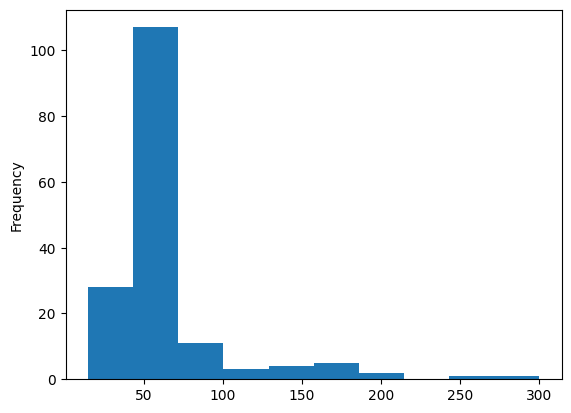

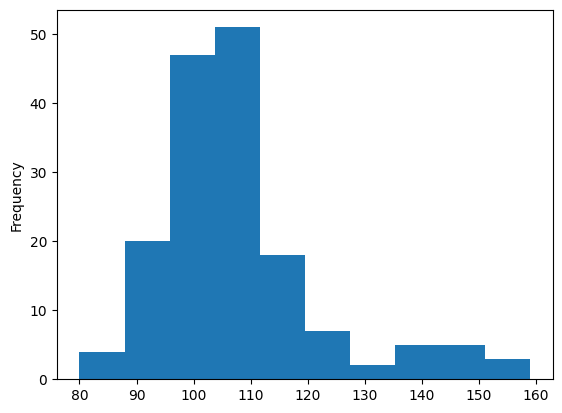

In [ ]:
# Histogram

print("Workouts more frecuents are 60 minutes long. And then, less than 60 50 minutes long")
working_large_calories_dataframe["Duration"].plot(kind = 'hist')
plt.show()

print("Workouts more frecuents are low cardio. 110ppm or less")
working_large_calories_dataframe["Pulse"].plot(kind = 'hist')
plt.show()
